In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# A partioning-based clustering algorithm: K-means

## Outline

- Algorithm
- Implementation
- scikit-learn implementation
- Choose K
- Data preprocessing

### Toy data generation

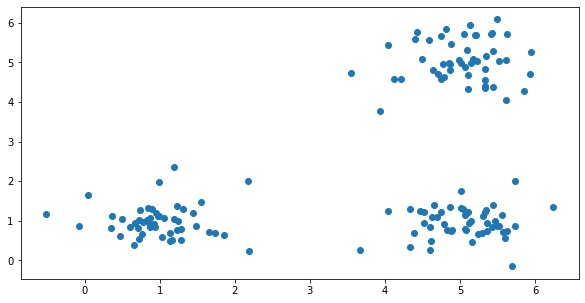

In [3]:
means = [np.array([1, 1]), np.array([5, 5]), np.array([5, 1])]
covariance = np.array([[0.25, 0], [0, 0.25]])
n_points = 50

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.show()

## K-means algorithm

__Objective__: Find _cluster centers_ or _centroids_ representing the different clusters

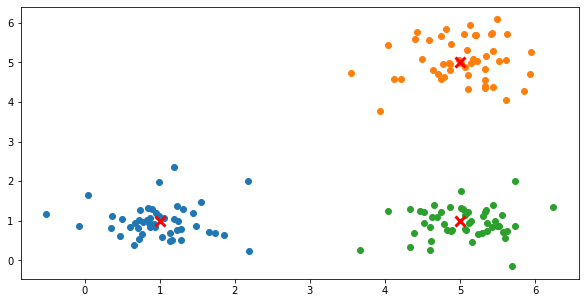

In [4]:
for i in range(3):
    plt.scatter(data[i][:, 0], data[i][:,1])
    plt.scatter(means[i][0], means[i][1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Formulation for M data points and K desired clusters. 

We call $c_k$ the centroid of cluster $k$, $a_{ik}$ the membership variable and $d(. ,.)$ the distance metric used.

$$\text{Minimize}_{A, c} \sum_{i=1}^{M} \sum_{k=1}^K a_{ik} \times d(x_i, c_k)$$
$$\text{subject to} \sum_{k=1}^K a_{ik} = 1, \forall i \in \{1, ..., M\}$$
$$a_{ik} \in \{0, 1\}, \forall i \forall k$$

#### Solving with the EM-algorithm

- Fix K, the desired number of clusters
- Initialize the K centroids as random points from the dataset
- Repeat:
    - Allocation update: Choose the new allocation as the closest centroid obtained at previous step
    - Centroid update: Compute the centroid of the new class (mean), defined by the new allocation obtained
at stage 2
- Stop when the centroids are not moving anymore


### Demonstration K-means

K=3

#### Initialization

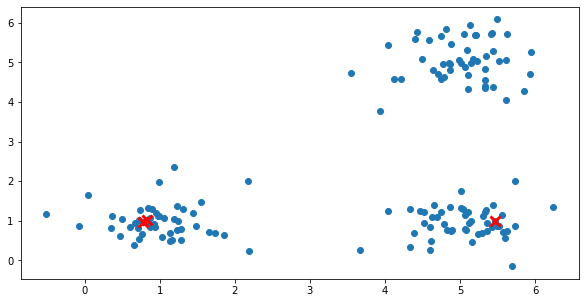

In [5]:
centroids_idx = np.random.randint(0, 3*n_points, 3)
centroids = all_data[centroids_idx]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Allocation update

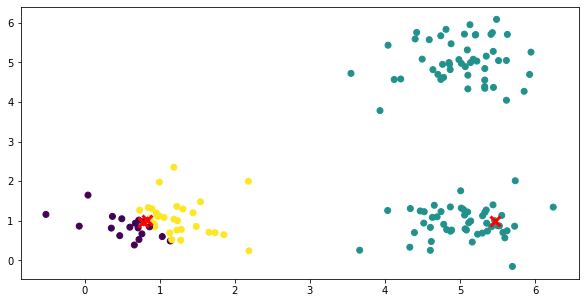

In [6]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i
            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Centroids update

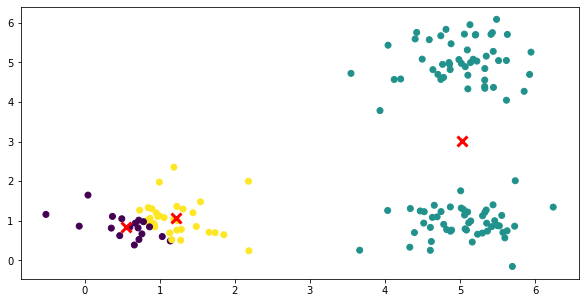

In [7]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### More steps

Allocation update


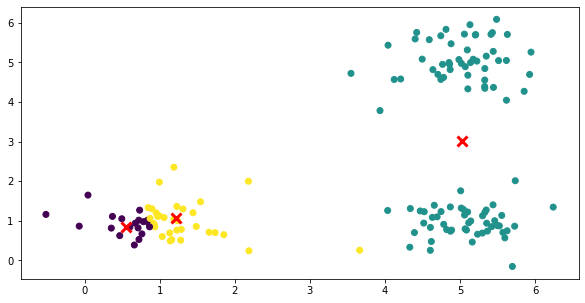

In [8]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i

print("Allocation update")            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

centroids update


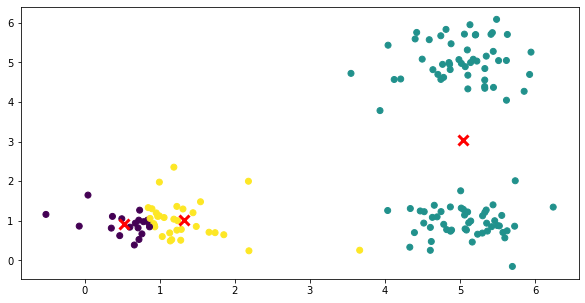

In [9]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

    
print("centroids update")    
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

Allocation update


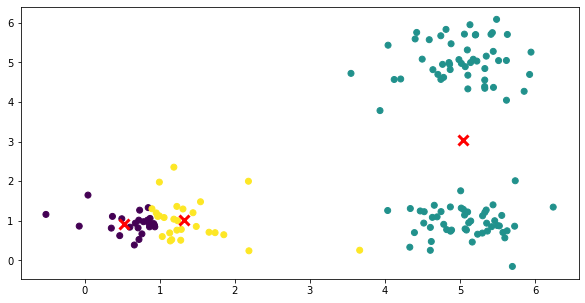

In [10]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i

print("Allocation update")            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

Centroids update


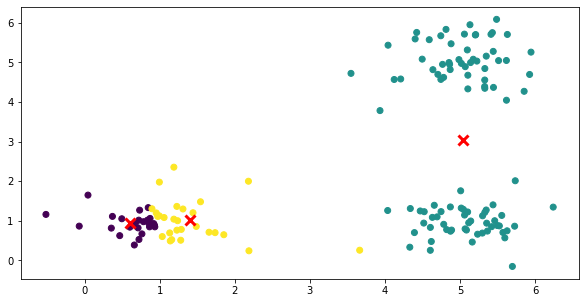

In [11]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

print("Centroids update")
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

## K-means using scikit-learn

In [12]:
from sklearn.cluster import KMeans

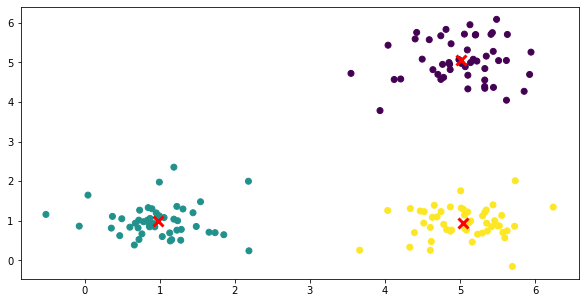

In [13]:
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(all_data)

clusters = kmeans.predict(all_data)
centroids = kmeans.cluster_centers_

plt.scatter(all_data[:, 0], all_data[:, 1], c=clusters)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

## Selecting the optimal number of clusters K

- The Elbow method
- The Silhouette method

### The Elbow method

Plot the inertia $I$ as a function of the number of clusters.
$$I=\sum_{i=0}^n \min_{k \in \{1, ..., K\}} (||x_i - c_k||^2)$$
Inertia is always decreasing when more clusters are added (clusters get tighter).\
However, when good groups are formed, inertia start decreasing _less_.\
Hence, __choose the number of clusters corresponding to the last big drop in I (the _elbow_ of the curve)__.

__Exercise: Try to compute the inertia curve for the toy example. Make K vary from 1 to 10.__\
*Hint: The K-means in sklearn has a kmeans.inertia_ parameter.*

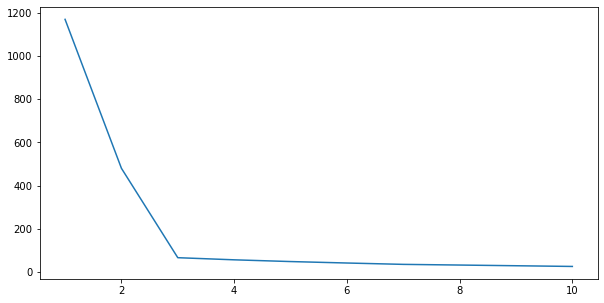

In [14]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_data)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.plot(range(1, 11), inertia)
plt.show()

## The silhouette method

The silhouette was seen in the previous slides. It takes into account both the points within a cluster but also from other clusters, Hence, it should not be always decreasing when K increases.

By plotting the silhouette curve for different values of K, we can simply choose the number of clusters with the highest silhouette.

_Exercise: Try to compute the silhouette curve for the toy example. Make K vary from 2 to 10._

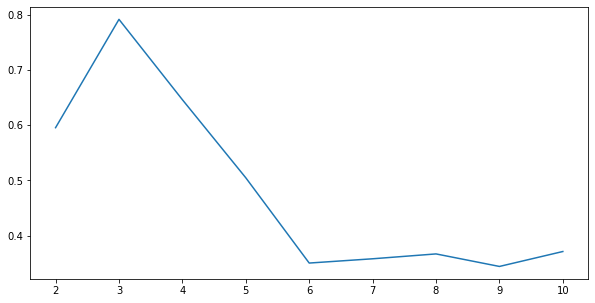

In [15]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(all_data)
    silhouette.append(silhouette_score(all_data, clusters))
silhouette = np.array(silhouette)

plt.plot(range(2, 11), silhouette)
plt.show()

## Data preprocessing

**Example:** We want to identify groups of people that are collected from a population.\
The data measured are the **weight (in kg)** and the **age (in minutes)** of the individuals.\
The objective is to identify the groups corresponding to men and women.\
The average weight of women is 60 kg and for men it is 80 kg. The variance is about 5 kg for both groups.\
The average age of both groups is 50 years and the variance is 10 years.

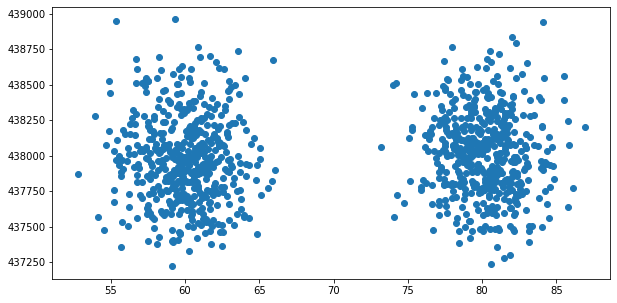

In [16]:
means = [np.array([60, 50*365*24]), np.array([80, 50*365*24])]
covariance = np.array([[5, 0], [0, 10*365*24]])
n_points = 500

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(2)]
all_data = np.r_[data[0], data[1]]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.show()

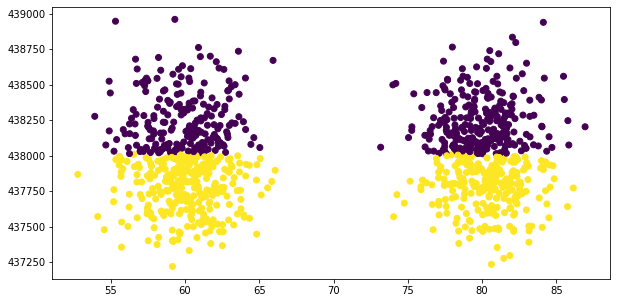

In [17]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(all_data)

plt.scatter(all_data[:, 0], all_data[:, 1], c=clusters)
plt.show()

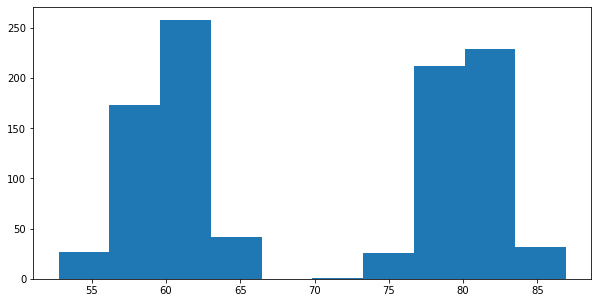

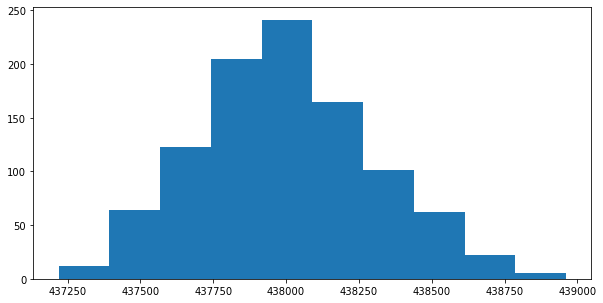

In [18]:
plt.hist(all_data[:, 0])
plt.show()
plt.hist(all_data[:, 1])
plt.show()

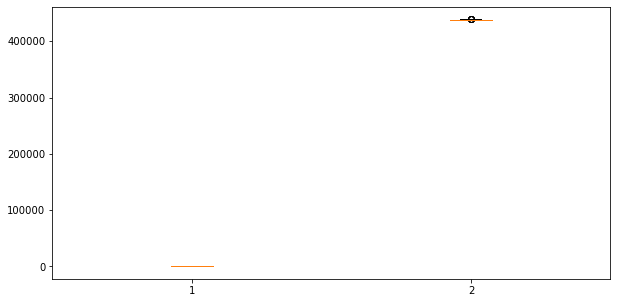

In [19]:
plt.boxplot(all_data)
plt.show()

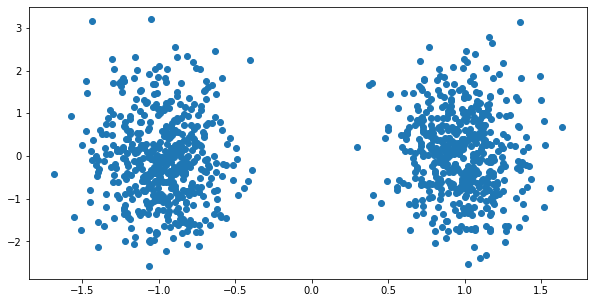

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
all_data_scaled = ss.fit_transform(all_data)

plt.scatter(all_data_scaled[:, 0], all_data_scaled[:, 1])
plt.show()

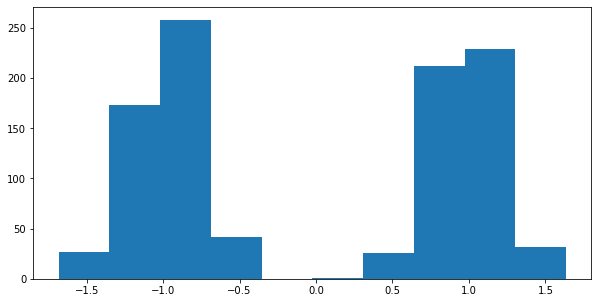

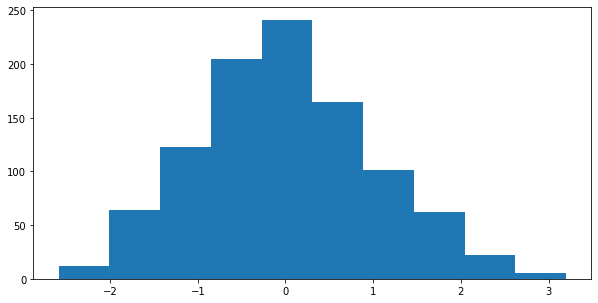

In [21]:
plt.hist(all_data_scaled[:, 0])
plt.show()
plt.hist(all_data_scaled[:, 1])
plt.show()

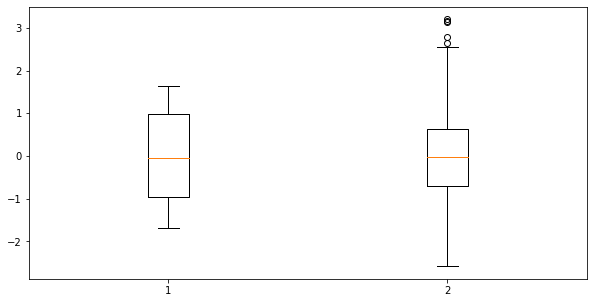

In [22]:
plt.boxplot(all_data_scaled)
plt.show()

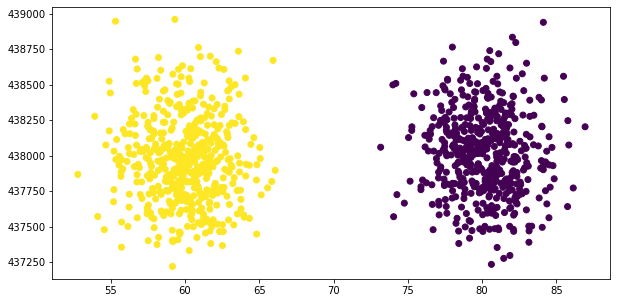

In [23]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(all_data_scaled)

plt.scatter(all_data[:, 0], all_data[:, 1], c=clusters)
plt.show()